# Exercise 3: Perceptron

## 3.1 Perceptron for data classification

In order to demonstrate the main concepts behind the perceptron, we have to define input and output data. We will use $N$ two-dimensional vectors $\mathbf{a}_i$ as input data organized in a $2\times N$ matrix $\mathbf{A}$ (two rows and $N$ columns).

$\mathbf{A}=\begin{bmatrix}
    a_{x_1} & a_{x_2} & \dots & a_{x_N}\\
    a_{y_1} & a_{y_2} & \dots & a_{y_N}
\end{bmatrix}$

Here, $N$ is the number of vectors and $a_{x_i}$, $a_{y_i}$ are the $x$ and $y$ coordinates of $i$-th vector. In this example we will demonstrate how to classify vectors in two classes. In this case, each vector can belong to only one of two possible classes, for example $C_0$ and $C_1$. Classes of each examples are defined using a matrix \mathbf{C}, whose dimensions are $1\times N$ defined as follows:

$\mathbf{C}=\left[c_1, c_2, \dots, c_N\right]$

Each element $c_i$ has value $0$ if vector $\mathbf{a}_i$ belongs to class $C_0$ and has value $1$ if vector belongs to class $C_1$.

### 3.1.1 Classification of linearly separable examples in 2D space

In this experiment we will show how to use the perceptron in order to classify a vector in two linearly separable classes. We will use the following vectors as input vectors:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a1=np.array([[1, 1]]).T
a2=np.array([[1, 1]]).T
a3=np.array([[2, 0]]).T
a4=np.array([[1, 2]]).T
a5=np.array([[2, 1]]).T

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_2$ and $\mathbf{a}_3$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Form the matrices $\mathbf{A}$ and $\mathbf{C}$ as explained.
2. Plot the vectors. Vectors belonging to the same class have the same color in the plot.

(2, 5)


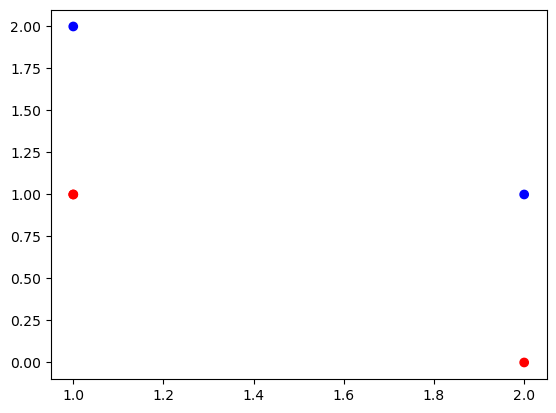

In [2]:
A = np.concatenate((a1, a2, a3, a4, a5), axis=1)
C = np.array([0, 0, 0, 1, 1]).reshape(1,5)
print(A.shape)
plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])

You can initialize the perceptron as follows:

In [3]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, C)
print(W)

[[ 0.48579607 -0.09869435 -0.1220841 ]]


Here, vector $\mathbf{W}$ is the vector with neural network weights. The first column of $\mathbf{W}$ represents the threshold value. The hyperplane can be visualized using following command:

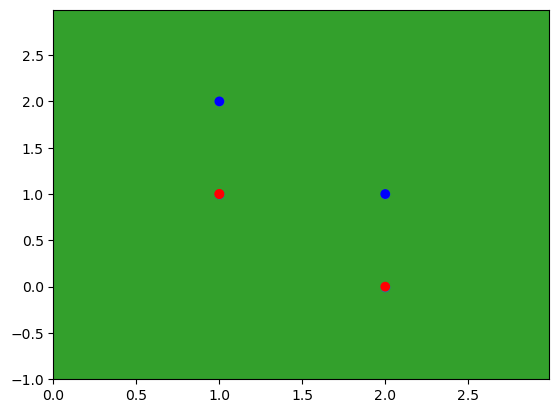

In [4]:
def predict(W, A):
    return (W@np.vstack([-np.ones((1, A.shape[1])), A])>=0).astype(int)

def plot(W, A):
    x_start, x_end=A[0, :].min()-1, A[0, :].max()+1
    y_start, y_end=A[1, :].min()-1, A[1, :].max()+1

    xx, yy=np.meshgrid(np.arange(x_start, x_end, 0.01), np.arange(y_start, y_end, 0.01))
    grid=np.vstack([xx.ravel(), yy.ravel()])

    Z=predict(W, grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(A[0, :], A[1, :])

    plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
    plt.show()

plot(W, A)

Previously initialized perceptron can be trained by calling the function *trainlms_p* until correct (or satisfactory) segmentation (division) of the plain is achieved:

In [5]:
def trainlms_p(ni, x, d, W, max_epoch):
    w=W.copy()

    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

**Tasks**

1. Plot the plane and positions of last vectors with the classification plane in two cases: before and after training. Are classes $C_1$ and $C_2$ correctly separated in both cases?
2. Show the segmentation error with regards to training iteration.
3. Think of an experiment where you will use the perceptron to find the border in 2D space and train the required perceptron.
4. Think of an experiment where you will use the perceptron to find the border in 3D space and train the required perceptron.

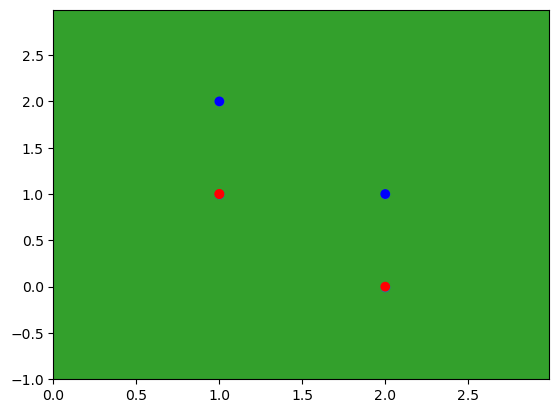

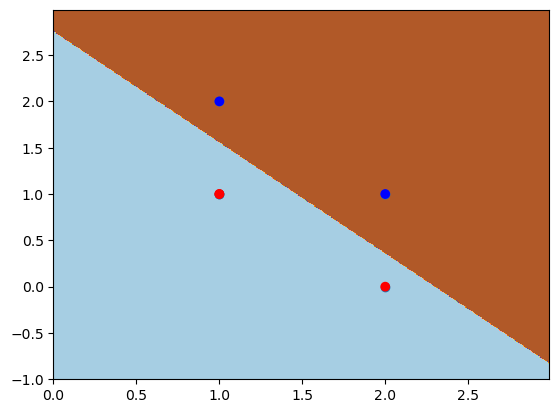

In [6]:
plot(W, A)
errors = []
W, errors = trainlms_p(0.01, A, C, W, 2000)
plot(W, A)


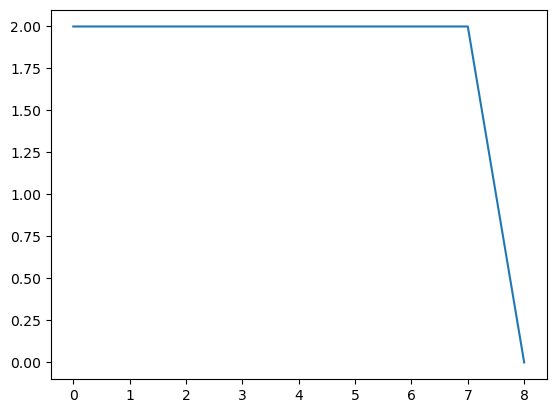

In [7]:
plt.plot(range(len(errors)), errors)

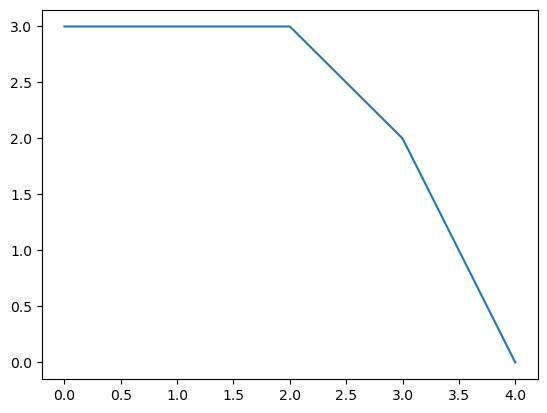

In [8]:
a1=np.array([[1, 1,2]]).T
a2=np.array([[1, 1,1]]).T
a3=np.array([[2, 0,0]]).T
a4=np.array([[1, 2,1]]).T
a5=np.array([[2, 1,0]]).T
A = np.concatenate((a1, a2, a3, a4, a5), axis=1)
C = np.array([0, 0, 0, 1, 1]).reshape(1,5)
W=initp(A, C)
errors = []
W_n, errors = trainlms_p(0.01, A, C, W, 2000)
plt.plot(range(len(errors)), errors)

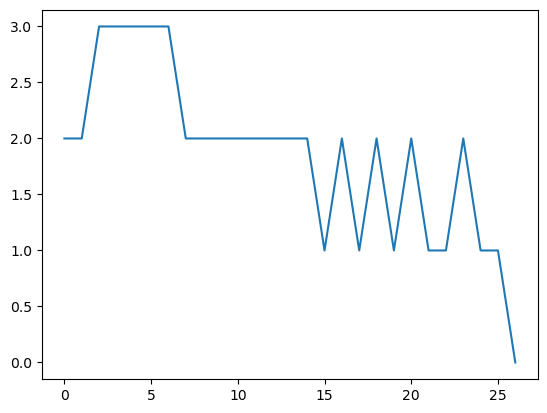

In [9]:
a1=np.array([[1, 1,2,0]]).T
a2=np.array([[1, 1,1,0]]).T
a3=np.array([[2, 0,0,1]]).T
a4=np.array([[1, 2,1,2]]).T
a5=np.array([[2, 1,0,2]]).T
A = np.concatenate((a1, a2, a3, a4, a5), axis=1)
C = np.array([0, 0, 0, 1, 1]).reshape(1,5)
W=initp(A, C)
errors = []
W_n, errors = trainlms_p(0.01, A, C, W, 2000)
plt.plot(range(len(errors)), errors)

### 3.1.2 Linearly inseparable case in 2D

In this experiment we will try to train a perceptron for two linearly inseparable classes. To be more precise, we will try to solve the logical XOR function problem. Input vectors ai will represent the function inputs and classes $C_0$ and $C_1$ will represent the function values:

In [10]:
A=np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
C=np.array([[0, 1, 1, 0]])

**Tasks**

1. Use the same training procedure from the first experiment. Plot the obtained results (i.e. plot the input vectors before and after the training phase in the same window). Plot the error as well.
2. Did perceptron learn to solve the XOR problem? Explain why.

In [11]:
#XOR problem is not a linearly seperatable problem 
#and the perception can only be taught to solve linearly seperatable problems corrrectly 
#that is why the perception will not be a good pick to solve this problem

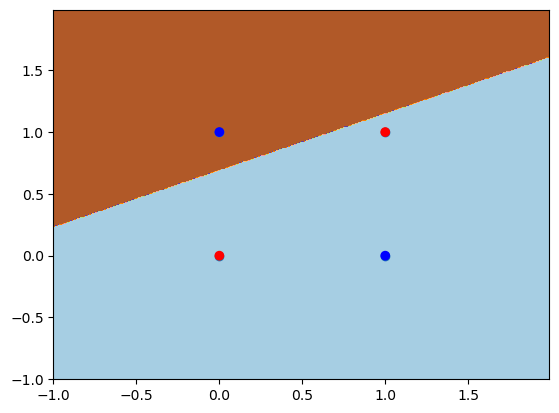

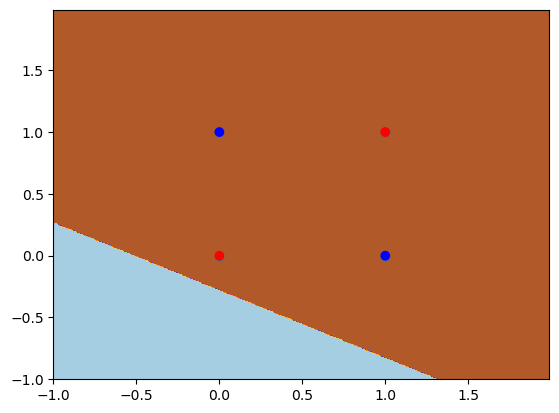

In [12]:
W=initp(A, C)
plot(W, A)
errors = []
W, errors = trainlms_p(0.01, A, C, W, 2000)
plot(W, A)

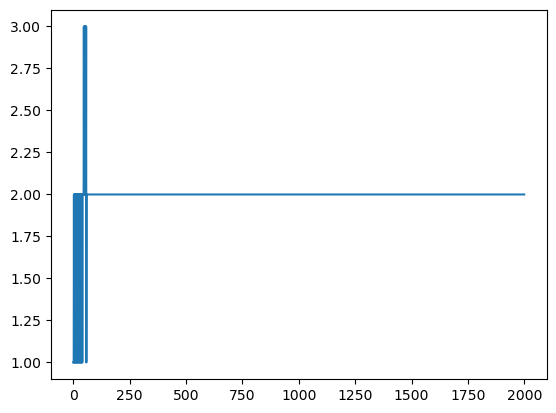

In [13]:
plt.plot(range(len(errors)), errors)

### 3.1.3 Classification of linearly separable examples in 3D space

This experiment shows how to classify examples in 3D space. Input vectors are three dimensional and belong to 2 classes which are linearly separable. Input vectors are:

In [14]:
a1=np.array([[0, 0, 0]]).T
a2=np.array([[0, 0, 1]]).T
a3=np.array([[0, 1, 0]]).T
a4=np.array([[0, 1, 1]]).T
a5=np.array([[1, 0, 0]]).T

A=np.hstack([a1, a2, a3, a4, a5])
C=np.array([[0, 1, 0, 0, 1]])

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_3$ and $\mathbf{a}_4$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Repeat the learning procedure from 3.1.1. and show the obtained results with plot of the error.
2. Change the vector classes until classes $C_0$ and $C_1$ become linearly inseparable. When does this happen?

[[ 0.17725191  0.27496499  0.2778221  -0.0736861 ]]


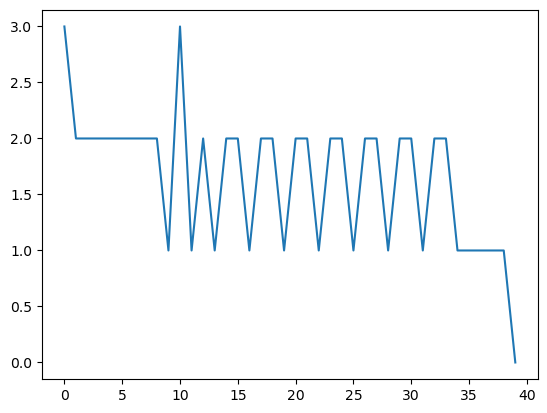

In [15]:
W=initp(A, C)
print(W)
errors = []
W, errors = trainlms_p(0.01, A, C, W, 2000)
plt.plot(range(len(errors)), errors)

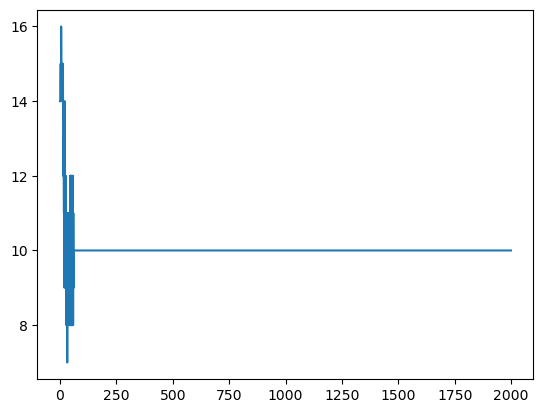

In [16]:
C=np.array([0, 1, 1, 0, 0])
W=initp(A, C)
errors = []
W, errors = trainlms_p(0.01, A, C, W, 2000)
plt.plot(range(len(errors)), errors)

## 3.2 Classification of examples with Gaussian distribution

The second part of this exercise tries to show how to classify examples with Gaussian distribution, which can be typically found in real life problems.

Suppose we have two classes of 2D vectors, where each class represents the realization of the random vector with Gaussian distribution. We will set the mean value and standard deviation of the first class to $E(C_0)=(10, 10)$ and $S(C_0)=2.5$ for each of the components. The second class will have the expected value $E(C_1)=(20, 5)$ and standard deviation $S(C_1)=2$. Create 100 vectors for each class as follows:

In [17]:
A1=np.random.normal((10, 10), (2.5, 2.5), size=(100,2)).T
A2=np.random.normal((20, 5), (2, 2), size=(100,2)).T

After this step we have to construct the matrix $\mathbf{A}$ containing vectors $\mathbf{A}_1$ and $\mathbf{A}_2$. We have to form the vector $\mathbf{C}$ which says that first that 100 elements belong to class $C_0$ and other elements belong to class $C_1$:

In [18]:
A=np.hstack([A1, A2])
C=np.hstack([np.zeros((1,100)), np.ones((1, 100))]).astype(int)

**Tasks**

1. Repeat the training procedure from the first part of the exercise. Plot the obtained results.
2. How many examples were misclassified?
3. If the input vector is given as $\mathbf{a}_i$=(10,3) where would we classify this example?

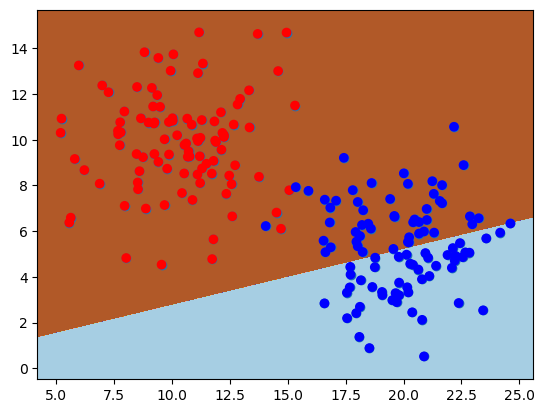

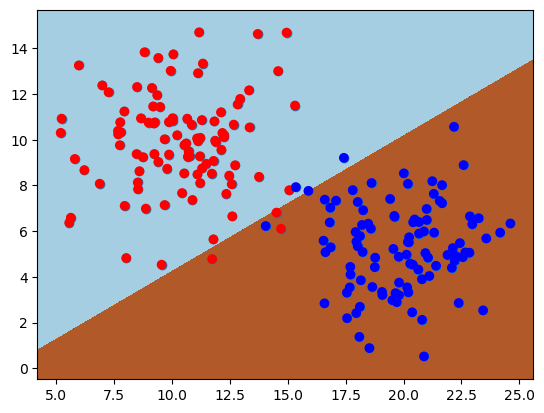

a1 = (10,3) --> C1
Number of misclassified examples --> 6


In [19]:
W=initp(A, C)
plot(W, A)
errors = []
W, errors = trainlms_p(0.01, A, C, W, 2000)
plot(W,A)
print("a1 = (10,3) --> C1" if np.dot(W,np.array([[-1,10,3]]).T) >= 0 else "a1 = (10,3) --> C2")
B = A.copy()
B = np.vstack((-np.ones((1, 200)), B))
classif = np.dot(W,B)

classif = (classif > 0).astype(int)
classif = (classif == C)
print(f'Number of misclassified examples --> {200-np.count_nonzero(classif)}')

### 3.3.1 Classification of examples using two perceptrons

The third part of the exercise shows how to use more than one perceptron in order to classify input vectors in larger number of classes. In Figure 4 we can see a network with two perceptrons which can be used in order to classify the examples in four linearly inseparable classes.

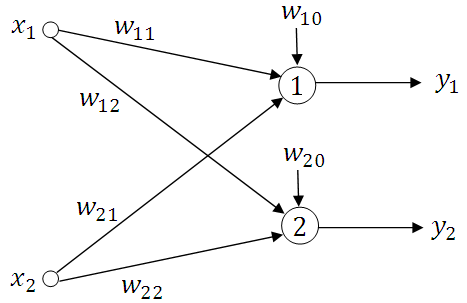

Figure 4. Two perceptrons for classification in four classes (outputs are binary coded)

Suppose we have 10 2D input vectors defined with matrix $\mathbf{A}$ where each column of the matrix represents one input vector:

In [20]:
A=np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5], [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])

Matrix $\mathbf{C}$ is used to define in which class each input vector belongs to:

In [21]:
C=np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]);

Each column of the matrix $\mathbf{C}$ is a 2D vector, where each two bits represent the binary coded class value for each input vector. Using two bits we can binary code four different values, which represent the class names: $C_0$, $C_1$, $C_2$, $C_3$. This network is trained using the same procedure used for the network with only one perceptron.

**Tasks**

1. Train the network. Plot the obtained results with plot of the error.

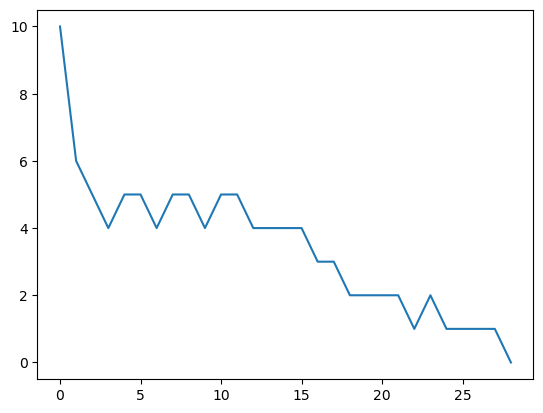

In [22]:
W=initp(A, C)
errors = []
W, errors = trainlms_p(0.01, A, C, W, 2000)
plt.plot(range(len(errors)), errors)

# Exercise 4: LMS algorithm for stock price prediction

## 4.1 Introduction

In this exercise the *trainlms* function given below will be used.

**Tasks**

1. What does the function *trainlms* do?

In [23]:
def predict(W, A):
    return W@np.vstack([-np.ones((1, A.shape[1])), A])

def trainlms(ni, x, d, W, max_epoch):
    w=W.copy()

    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

## 4.2 Stock price movement

Download stock.txt file from the course web pages.

If your are using Google Colaboratory instead of running the notebook locally, upload the file on your Google Drive and run the following cell:

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

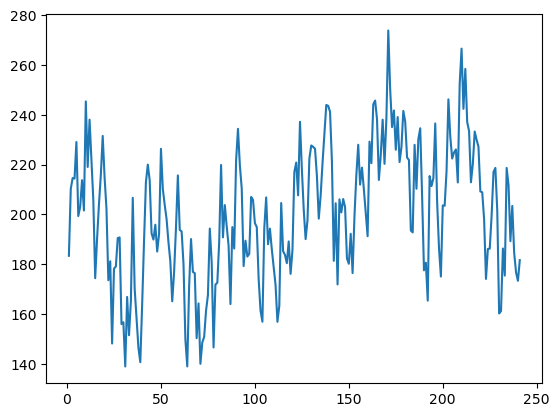

In [25]:
# Loading data from a file for a local notebook
data=np.loadtxt("stock.txt", delimiter=",")

# Loading data from a file for a Colab notebook
#data=np.loadtxt("/content/gdrive/My Drive/Notebooks/stock.txt", delimiter=",")

import matplotlib.pyplot as plt
plt.plot(range(1, data.shape[0]+1), data)
plt.show()

The goal of this exercise is to use several (let us say $N$) previous share prices in order to predict the share price for today. This is useful because we can buy or sell the price before its price rises or falls and in that way increase our profit or lower our loss. The first step is to find the input-output pairs, which will be used on order to train our network. The size of this set will be defined using variable $i$. Our inputs will be vectors $\mathbf{a}_i$, which we put in matrix $\mathbf{A}$. Outputs are scalar values, which we put in vector $y$.

**Tasks**

1. Write the function *memory*, which for given day in the year (index of the variable *data*) constructs a column vector $\mathbf{a}$ whose elements represent the prices for last *N* days but without the price for today.
2. Using the function *memory* write a function *memorize*, which for given inputs (*data*, *day*, *N*, *i*) constructs the matrix $\mathbf{A}$ in which each column vector represents the $\mathbf{a}_i$ for the previous day. So, matrix $\mathbf{A}$ memorizes $i$ memories which we will use in order to train our network.

In [26]:
def memory(data,N,day):
    return np.array([data[day-N:day]]).T

def memorize(data, day, N, i):
    myList = np.empty((N, 0))
    for j in range(i-1,-1,-1):
        myList = np.hstack((myList, memory(data,N,day-j)))
    return myList

Construct the matrix $\mathbf{A}$ using the command:

In [27]:
day=151
N=70
i=50
A=memorize(data, day, N, i)
print(A.shape)

(70, 50)


The output vector is constructed using the command:

In [28]:
y=np.array([data[day-i+1:day+1]])

We initialize the perceptron as follows:

In [29]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)
W=initp(A, y)

We train the perceptron using the command:

In [30]:
ni=1e-8
max_num_iter=10000

W1, errors=trainlms(ni, A, y, W, max_num_iter)

Weights of the network are memorized in the matrix $\mathbf{W}_1$. Variable *ni* should be experimentally found. Train the network for different values of *i*, *N*, *max_num_iter*. We can visualize the output of the network on the training data using the following command:

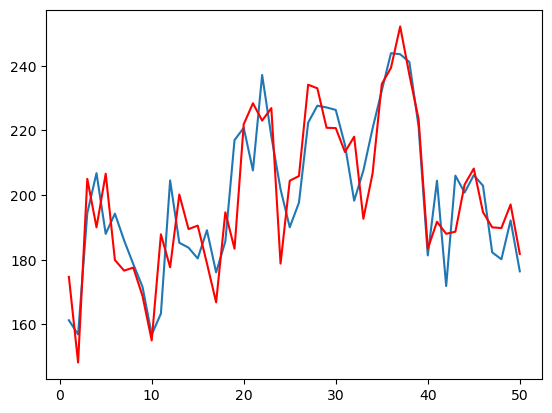

In [31]:
p=predict(W1, A)

plt.plot(range(1, y[0].shape[0]+1), y[0])
plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
plt.show()

Here, the blue color shows the predicted values and the red color shows the real outputs.

**Tasks**

1. Memorize different weight matrices ($\mathbf{W}_1$, $\mathbf{W}_2$...) with different combinations of following parameters *i*=30, 50 or 100; *N*=20, 50 or 80; *max_num_iter*=10000, 50000 or 500000. (Choose 6 different combinations.) For selected parameter combinations show the obtained predictions with real values. Comment the obtained results.

In [ ]:
#I used 6 combinations with the same number of iterations, with different i and N
#from the graphs we can see that the models with i 50 preform better than models with i 30 and the ones 
#higher N value also provide better results

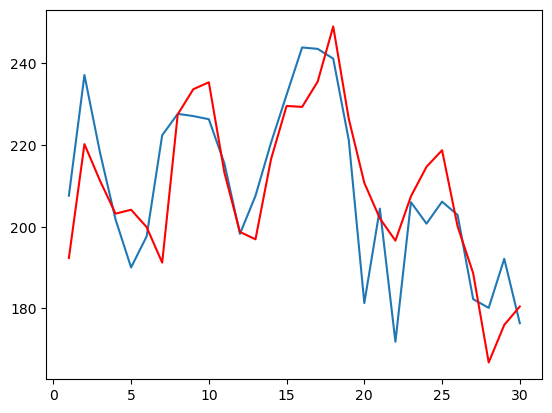

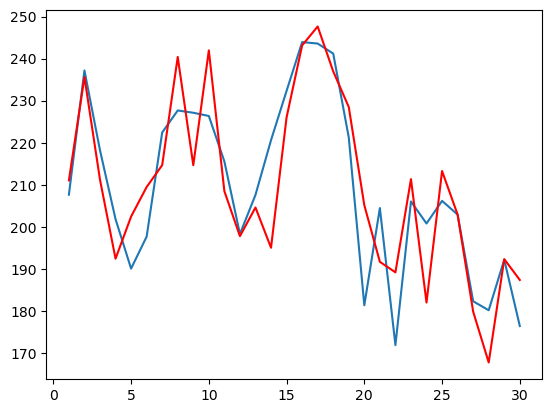

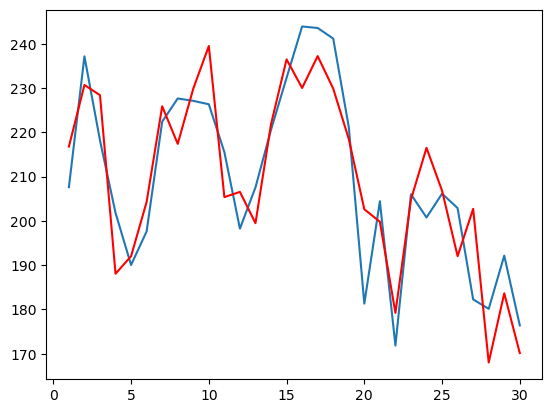

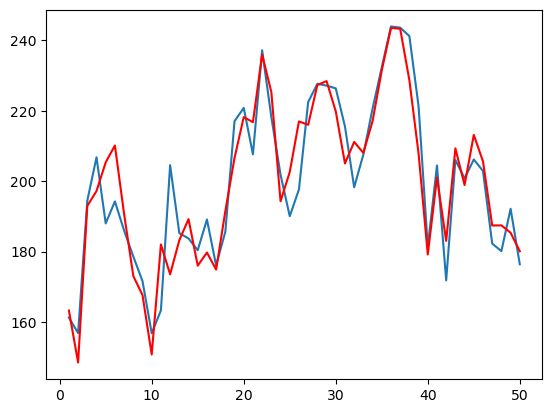

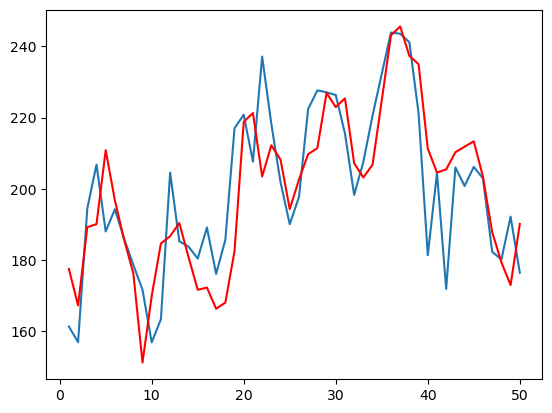

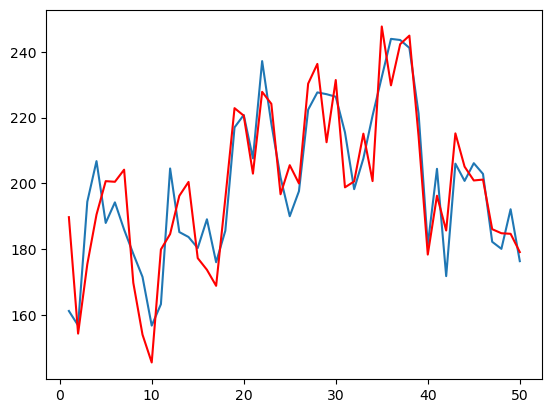

In [32]:
combinations = [(30,20,10000),(30,50,10000),(30,80,10000),(50,50,10000),(50,20,10000),(50,80,10000)]
day=151
for el in combinations:
    N=el[1]
    i=el[0]
    A=memorize(data, day, N, i)
    y=np.array([data[day-i+1:day+1]])
    W=initp(A, y)
    ni=1e-8
    max_num_iter=el[2]
    W1, errors=trainlms(ni, A, y, W, max_num_iter)
    p=predict(W1, A)
    plt.plot(range(1, y[0].shape[0]+1), y[0])
    plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
    plt.show()

If we do not use any intelligence for stock price prediction and we assume the price will be (almost) the same tomorrow, the error we make is:

In [184]:
a=data[day:day+1]
y=data[day+1:day+2]        
err_oo=np.sum(np.abs(y-a)) 

If we use the network trained on previous days to predict the price for tomorrow, the error is as follows:

In [185]:
p=predict(W1, memorize(data, day+1, N, 1))
err_nn=np.sum(np.abs(y-p))

If we trade each day with the given stock, our error can be easily measured. Our potential profit can be calculated as follows:

In [186]:
profit=err_oo-err_nn
print(profit)

8.924599575535296


To predict the price of the day after tomorrow, we could use the same network or we could train the network from scratch by also using the data of the day before the day after tomorrow i.e. by using the data of tomorrow. Which way would be better?

**Tasks**

1. Create a table in which you will show the obtained profit levels depending on the parameters used (*i*, *N*, and *max_num_iter*). For of these parameter triplets the profit should be the sum of the profit for every possible *day* for which training data defined by *i* and *N* exists.

In [187]:
combinations = [(30,20,10000),(30,50,10000),(30,80,10000),(50,50,10000),(50,20,10000),(50,80,10000)]
data_list = []
day = 151
for comb in combinations:
    i = comb[0]
    N = comb[1]
    max_iter = comb[2]
    
    A=memorize(data, day, N, i)
    y=np.array([data[day-i+1:day+1]])
    
    W=initp(A, y)
    W1, errors=trainlms(ni, A, y, W, max_iter)
    
    a=data[day-i:day+1]
    y=data[day+1-i:day+2]
    
    err_oo=np.sum(np.abs(y-a))
    
    p=[]
    for j in range(i,-1,-1):
        p.append(predict(W1, memorize(data, day-j, N, 1))[0][0])
        
    err_nn=np.sum(np.abs(y-p))
    profit=err_oo-err_nn
    
    print(f'i = {i}, N = {N}, max_iter = {max_iter} --> profit : {profit} ')


i = 30, N = 20, max_iter = 10000 --> profit : 12.142012953827077 
i = 30, N = 50, max_iter = 10000 --> profit : -40.52837401193386 
i = 30, N = 80, max_iter = 10000 --> profit : -20.085247639636975 
i = 50, N = 50, max_iter = 10000 --> profit : -6.75249833274097 
i = 50, N = 20, max_iter = 10000 --> profit : -68.28803641050536 
i = 50, N = 80, max_iter = 10000 --> profit : -25.64172455666005 
